In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.neighbors import kneighbors_graph
import umap

In [2]:
def get_data():
    # This method reads in the Heat Kill vs Normal Data in from your working directory
    heat_kill_data=pd.read_csv("E-TABM-734-A-AFFY-44-query-results.tsv",sep='\t')
    columns = heat_kill_data.columns
    return heat_kill_data, columns

In [3]:
def get_significant(data, header, cutoff):
    # This method takes in the dataframe, a column name (header) and a number of rows (cutoff) and returns
    # a sorted data frame of only the cutoff lowest pvalues and their rows. If pValue is not in the header, the
    # method will return an error.
    if 'pValue' in header:
        srted = data.sort_values(header)
        sig_data = srted[:(cutoff)]
        return sig_data
    else:
        print('Error: This is not pvalue data')

In [88]:
def bar_plot(data, genes, columns, cutoff):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Macrophage Transcriptome Fold Changes', fontsize=15)
    #fig.tight_layout(pad=1.0)
    fig.subplots_adjust(wspace=0.2, hspace=0.30)
    fold_columns = [3, 6, 9, 12]
    p_columns = [4, 7, 10, 13]
    for index, i in enumerate(range(4)):
        sig_data = get_significant(data, columns[p_columns[index]], cutoff)
        if index == 0:
            axs[0,0].bar(sig_data[columns[1]], sig_data[columns[3]])
            axs[0,0].tick_params(rotation=-45, labelsize=12)
            axs[0,0].title.set_text('Response to E. coli in Healthy')
        if index == 1:
            axs[0,1].bar(sig_data[columns[1]], sig_data[columns[6]])
            axs[0,1].tick_params(rotation=-45, labelsize=12)
            axs[0,1].title.set_text('Response to E. coli in UC')
        if index == 2:
            axs[1,0].bar(sig_data[columns[1]], sig_data[columns[9]])
            axs[1,0].tick_params(rotation=-45, labelsize=12)
            axs[1,0].title.set_text('Difference in Response to E. coli')
        if index == 3:
            axs[1,1].bar(sig_data[columns[1]], sig_data[columns[12]])
            axs[1,1].tick_params(rotation=-45, labelsize=12)
            axs[1,1].title.set_text('Difference in Baseline')
            


In [90]:
def main():
    heat_kill_data, columns = get_data() # Read in and capture the data as well as a list of column headers
    cutoff = 5 # Set the number of rows we want
    gene_name = columns[1]
    bar_plot(heat_kill_data, gene_name, columns, cutoff)

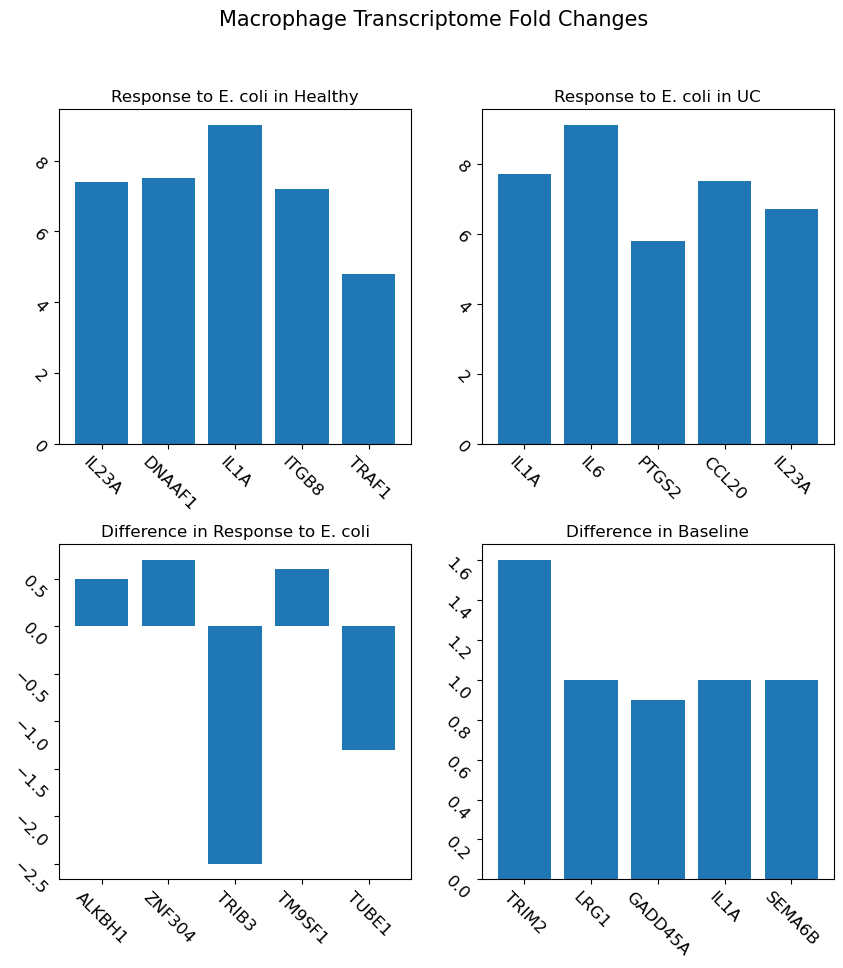

In [91]:
if __name__ == "__main__":
    main()